# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           5.02e-23
Time:                        16:34:01   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

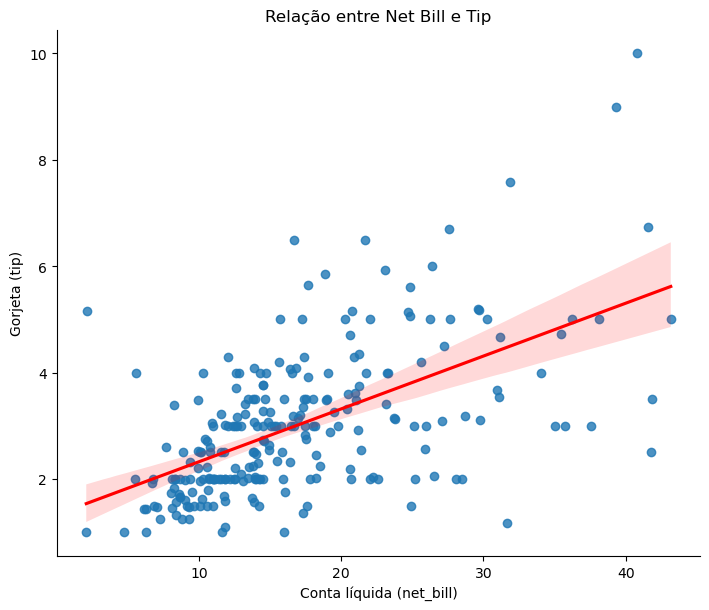

In [3]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

# Regressão linear: tip ~ net_bill
modelo = smf.ols('tip ~ net_bill', data=tips).fit()

# Resumo do modelo
print(modelo.summary())

# Gráfico de dispersão + linha de regressão
sns.lmplot(x='net_bill', y='tip', data=tips, height=6, aspect=1.2, line_kws={'color': 'red'})
plt.title('Relação entre Net Bill e Tip')
plt.xlabel('Conta líquida (net_bill)')
plt.ylabel('Gorjeta (tip)')
plt.show()



### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.52e-06
Time:                        16:34:52   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

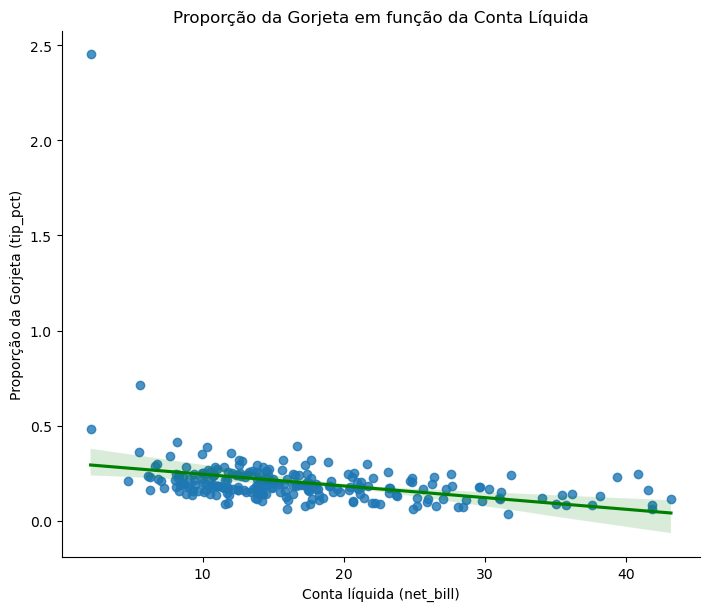

In [4]:
# Regressão linear: tip_pct ~ net_bill
modelo_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Resumo do modelo
print(modelo_pct.summary())

# Gráfico de dispersão + linha de regressão
sns.lmplot(x='net_bill', y='tip_pct', data=tips, height=6, aspect=1.2, line_kws={'color': 'green'})
plt.title('Proporção da Gorjeta em função da Conta Líquida')
plt.xlabel('Conta líquida (net_bill)')
plt.ylabel('Proporção da Gorjeta (tip_pct)')
plt.show()



### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Ao compararmos os dois modelos de regressão, percebemos que a relação entre o valor da gorjeta (tip) e a conta líquida (net_bill) é positiva e bem definida, enquanto a proporção da gorjeta em relação à conta (tip_pct) apresenta uma tendência negativa mais sutil. Isso indica que, embora o valor absoluto da gorjeta aumente com o valor da conta, a proporção da gorjeta tende a diminuir — possivelmente porque gorjetas mais altas não crescem proporcionalmente em contas maiores. Visualmente, o ajuste do modelo tip ~ net_bill é mais forte e linear, ao passo que o modelo tip_pct ~ net_bill mostra maior dispersão. No entanto, os R² desses modelos não devem ser comparados diretamente, pois cada um explica uma variável dependente diferente e, portanto, capturam fenômenos distintos em escalas diferentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [5]:
# Criar variáveis auxiliares
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Ajustar o modelo de tip_pct ~ net_bill
reg_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Passo 1: valores preditos para tip_pct
tips['pred_tip_pct'] = reg_pct.fittedvalues

# Passo 2: predição de tip = tip_pct * net_bill
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Passo 3: calcular o R² do modelo reescalado (para tip)
SSE = ((tips['tip'] - tips['pred_tip']) ** 2).sum()
SST = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()
r2_reescalado = 1 - SSE/SST
print(f"R² do modelo reescalado (via tip_pct): {r2_reescalado:.4f}")

# Passo 4: comparar com o R² do modelo direto tip ~ net_bill
reg_direto = smf.ols('tip ~ net_bill', data=tips).fit()
print(f"R² do modelo direto (tip ~ net_bill): {reg_direto.rsquared:.4f}")

R² do modelo reescalado (via tip_pct): 0.1089
R² do modelo direto (tip ~ net_bill): 0.3325
